## What is Softmax Regression

# 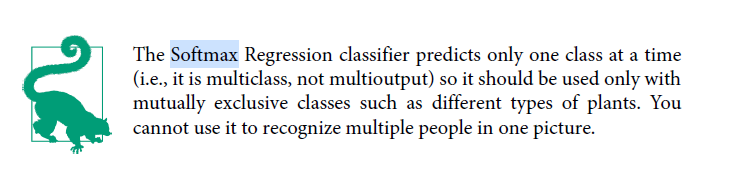

- Birden fazla class olduğu durumlardan içlerinden en uygun classı olasılıklarını kıyaslayarak seçebilir.
- Formul : sigma(X^t * teta) = olasılık değerini verir
- teta her bir class için farklıdır

## What is Batch Gradient Descent

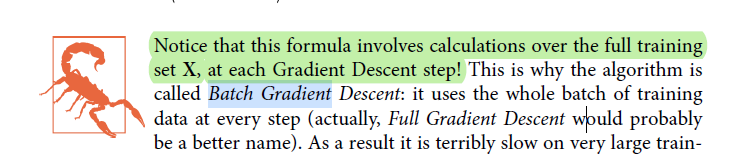

- Tüm training setin her bir teta değeri  için incelenip error rate'in en az oldugu teta değerinin bulundugu algoritmaya denir.
- teta her seferinde learning rate kadar degişir
- Formul : teta = teta - learningrate * turev(mse function)
- Formul : mse function = E(X^t * teta - y)

In [6]:
#Let's import IRIS data
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

In [7]:
print('iris.data.shape = ',iris.data.shape) 
print('iris.target.shape = ',iris.target.shape) 

iris.data.shape =  (150, 4)
iris.target.shape =  (150,)


In [14]:
#Prepare Dataset
X = iris.data
y = iris.target
print(np.unique(y))
# Add a bias term in X
X_with_bias = np.c_[np.ones([150, 1]), X] #c_ = concatenate
X_train = X_with_bias[:120]
X_test = X_with_bias[120:]
y_train = y[:120]
y_test = y[120:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

[0 1 2]


((120, 5), (30, 5), (120,), (30,))

In [29]:
#Create Probability Matrix
# we have 0,1 and 2 as a target

for target in y:
    if target == 0:
        probability_matrix.append((1,0,0))
    elif target == 1:
        probability_matrix.append((0,1,0))
    else:
        probability_matrix.append((0,0,1))
        
probability_matrix_train = probability_matrix[:120]

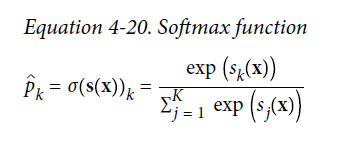

In [1]:
#Softmax formula


def softmax_probability(score_vector):
    exps = np.exp(score_vector)
    exp_sums = np.sum(exps)
    return exps / exp_sums

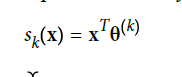

In [31]:
#x^t * teta 
#(150,5) * (?,?) = (150,3)
#           5,3 must

theta = np.random.rand(5,3)
eta = 0.2
iterations = 5000


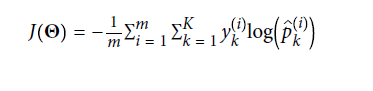

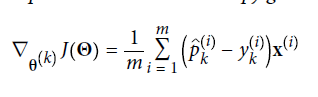

In [35]:
for i in range(iterations):
    score_vector = X_train.dot(theta)
    probability = softmax_probability(score_vector)
    loss = -np.mean(np.sum(probability_matrix_train * np.log(probability), axis=1))
    error = probability - probability_matrix_train
    print(i, loss)
    gradients = 1/120 * X_train.T.dot(error)
    theta = theta - eta * gradients

0 1.9679361774533215
1 1.1704258990917986
2 0.7645458518924854
3 0.7414080931316157
4 0.7128179871307708
5 0.7242720390318718
6 0.6394863986697107
7 0.7623386801105103
8 0.9197220318294016
9 1.5781529037434239
10 1.5954281178938847
11 1.3683871598108879
12 1.835133005596775
13 1.2163899341210764
14 0.6273808444674922
15 0.7186245577313876
16 1.1602380822544032
17 1.4745700637472763
18 0.591599345576116
19 0.5246197180779484
20 0.8707729082240794
21 1.4518198648566687
22 0.5065541180834848
23 0.48484528979546254
24 0.7629652448265727
25 1.3547201230055579
26 0.44821956836382953
27 0.47929682741006163
28 0.722987280461182
29 1.2947982940059934
30 0.4136903947045042
31 0.456615711850425
32 0.6833875094459743
33 1.2421552085510157
34 0.3922888519213801
35 0.45763983272550474
36 0.675717170975639
37 1.2209069422222605
38 0.3721286146134818
39 0.42941154318775315
40 0.6404731219964247
41 1.1745845398499541
42 0.3605933431906688
43 0.44507527647450595
44 0.6489743593825726
45 1.17084944205067

In [38]:
score_vector_test = X_test.dot(theta)
probability_matrix_test = softmax_probability(score_vector_test)
probability_test = np.argmax(probability_matrix_test, axis=1)

accuracy_score = np.mean(y_test == probability_test)
accuracy_score

0.8